In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set seed 
SEED = 42

np.random.seed(SEED)              

In [ ]:
import os

os.makedirs("figures", exist_ok=True)

In [2]:
#Load Dataset
df = pd.read_csv('internet_usage.csv')
print(df.shape)
df.head()

(217, 26)


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [3]:
# Select columns from 2000 to 2023
years_columns = df.loc[:, '2000':'2023'].columns

In [4]:
#Convert Broken Characters (..) from years columns to NaN
df[years_columns] = df[years_columns].apply(pd.to_numeric, errors='coerce') #convert strings to numeric
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,...,7.0,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,NaN,NaN,NaN
1,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,...,54.3,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,...,29.5,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,10.538800,NaN,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,...,86.1,87.90,89.7000,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN


In [5]:
mask_all_nan = df[years_columns].isna().all(axis=1)
all_nan_countries = df.loc[mask_all_nan]

print("Countries with all NaN values in years columns: ", all_nan_countries['Country Name'].tolist())
print("Total countries having all NaN values: ", len(all_nan_countries['Country Name']))
all_nan_countries

Countries with all NaN values in years columns:  ['American Samoa', 'Channel Islands', 'Isle of Man', 'Northern Mariana Islands', 'Sint Maarten (Dutch part)', 'St. Martin (French part)', 'Turks and Caicos Islands']
Total countries having all NaN values:  7


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Isle of Man,IMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Northern Mariana Islands,MNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Sint Maarten (Dutch part),SXM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,St. Martin (French part),MAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Turks and Caicos Islands,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop that 7 countries from the df having all NaN values
df = df.dropna(subset=years_columns, how='all')
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(210, 26)


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,...,7.0000,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,NaN,NaN,NaN
1,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,...,54.3000,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,...,29.5000,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN
3,Andorra,AND,10.538800,NaN,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,...,86.1000,87.90,89.7000,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN
4,Angola,AGO,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.50000,1.70000,...,21.3623,22.00,23.2000,26.0000,29.0000,32.1294,36.6347,37.8067,39.2935,NaN


In [7]:
# Check how many NaN values are still present in different rows (nan values for each country)
nan_counts = df.isna().sum(axis=1)
country_nan_counts = pd.DataFrame({
    'Country Name': df['Country Name'],
    'NaN Count': nan_counts
})

display(country_nan_counts)

total_nan = df.isna().sum().sum()
print("Total NaN values in the dataset:", total_nan)


,Country Name,NaN Count
0,Afghanistan,4
1,Albania,0
2,Algeria,1
3,Andorra,3
4,Angola,1
...,...,...
205,Virgin Islands (U.S.),6
206,West Bank and Gaza,0
207,"Yemen, Rep.",3
208,Zambia,1


Total NaN values in the dataset: 437


In [8]:
# Interpolate NaN values for each country across the years
for i in range(len(df)):
    country_years = df.loc[i, years_columns]
    country_years_interpolated = country_years.interpolate(method='linear', limit_direction='both')
    country_years_interpolated = country_years_interpolated.ffill()
    country_years_interpolated = country_years_interpolated.bfill()
    df.loc[i, years_columns] = country_years_interpolated

df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\2028708012.py:4: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  country_years_interpolated = country_years.interpolate(method='linear', limit_direction='both')


,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,0.004723,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,...,7.0000,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,18.4000,18.4000,18.4000
1,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,...,54.3000,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,...,29.5000,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,71.2432
3,Andorra,AND,10.538800,10.538800,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,...,86.1000,87.90,89.7000,91.5675,91.5675,90.7187,93.2056,93.8975,94.4855,94.4855
4,Angola,AGO,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.50000,1.70000,...,21.3623,22.00,23.2000,26.0000,29.0000,32.1294,36.6347,37.8067,39.2935,39.2935


In [9]:
# Check for NaN values again
nan_counts = df.isna().sum(axis=1)
country_nan_counts = pd.DataFrame({
    'Country Name': df['Country Name'],
    'NaN Count': nan_counts
})

display(country_nan_counts)

total_nan = df.isna().sum().sum()
print("Total NaN values in the dataset:", total_nan)

,Country Name,NaN Count
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0
...,...,...
205,Virgin Islands (U.S.),0
206,West Bank and Gaza,0
207,"Yemen, Rep.",0
208,Zambia,0


Total NaN values in the dataset: 0


In [10]:
# Drop the Country Code column from the df
df_combined = df.drop(columns=['Country Code'])

In [11]:
# Make sure the ranges are between 0 to 100
in_range = df[years_columns].apply(lambda x: (x >= 0) & (x <= 100)).all().all()

if in_range:
    print("All the values are between 0 and 100")
else:
    print("Some values are outside the range 0-100")


All the values are between 0 and 100


C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\4081417575.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(2020, asia_avg[-3]),
C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\4081417575.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(2020, asia_avg[-3] + 10),


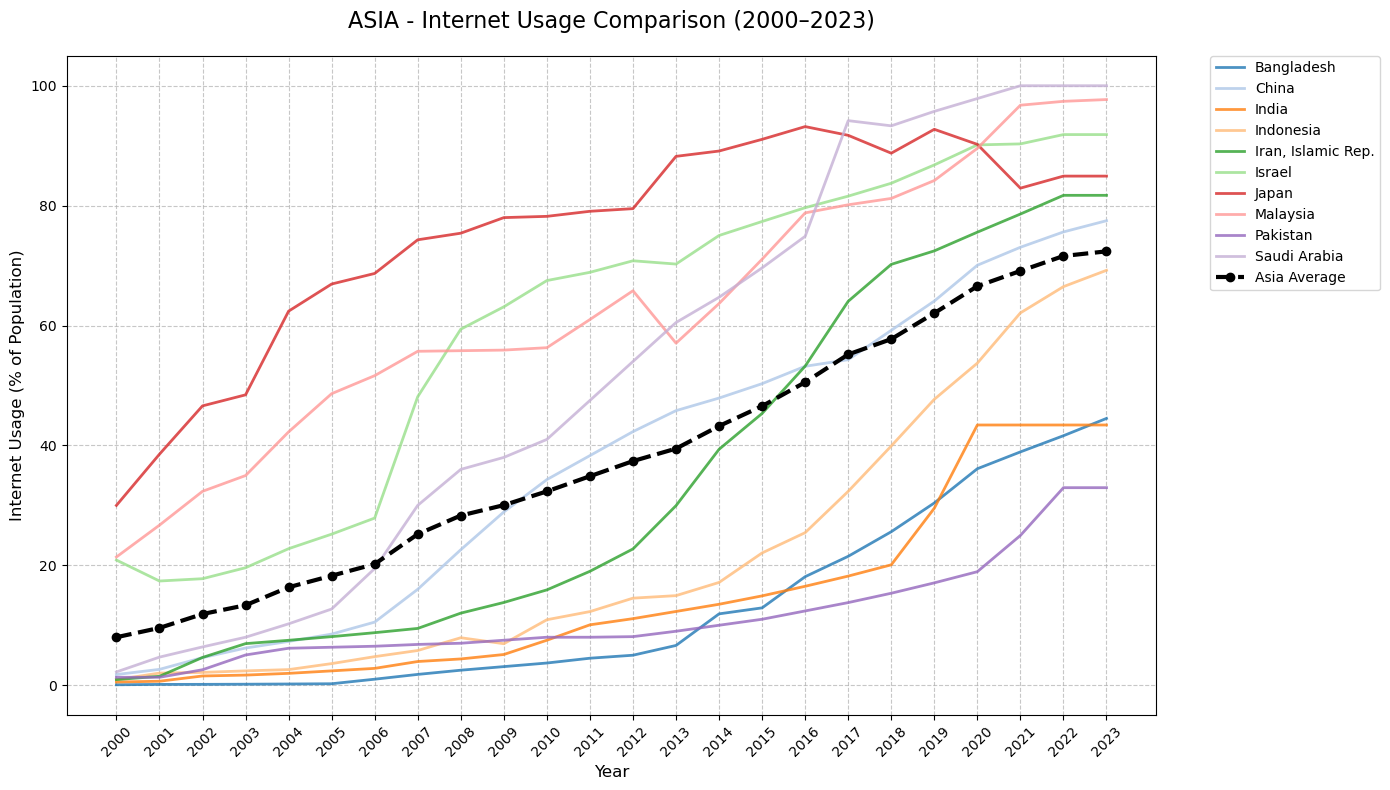

In [12]:
#Plot penetration rates over years for Asia
asia_countries  = ["Bangladesh","China","India","Indonesia","Iran, Islamic Rep.","Israel","Japan","Malaysia","Pakistan","Saudi Arabia"]

plt.figure(figsize=(14, 8))

colors = plt.cm.tab20.colors

for i, country in enumerate(asia_countries):
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:],
             row.values.flatten(),
             label=country,
             color=colors[i % len(colors)],
             linestyle='-',
             linewidth=2,
             alpha=0.8)

asia_data = df_combined[df_combined.iloc[:, 0].isin(asia_countries)].iloc[:, 1:]
asia_avg = asia_data.mean(axis=0)
plt.plot(df_combined.columns[1:],
         asia_avg,
         label='Asia Average',
         color='black',
         linestyle='--',
         linewidth=3,
         marker='o',
         markersize=6)

plt.title("ASIA - Internet Usage Comparison (2000–2023)", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           fontsize=10)

plt.annotate('Asia Average',
             xy=(2020, asia_avg[-3]),
             xytext=(2020, asia_avg[-3] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.tight_layout()
plt.savefig("figures/asia.png", bbox_inches='tight')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\104427198.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(2020, africa_avg[-3]),
C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\104427198.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(2020, africa_avg[-3] + 10),


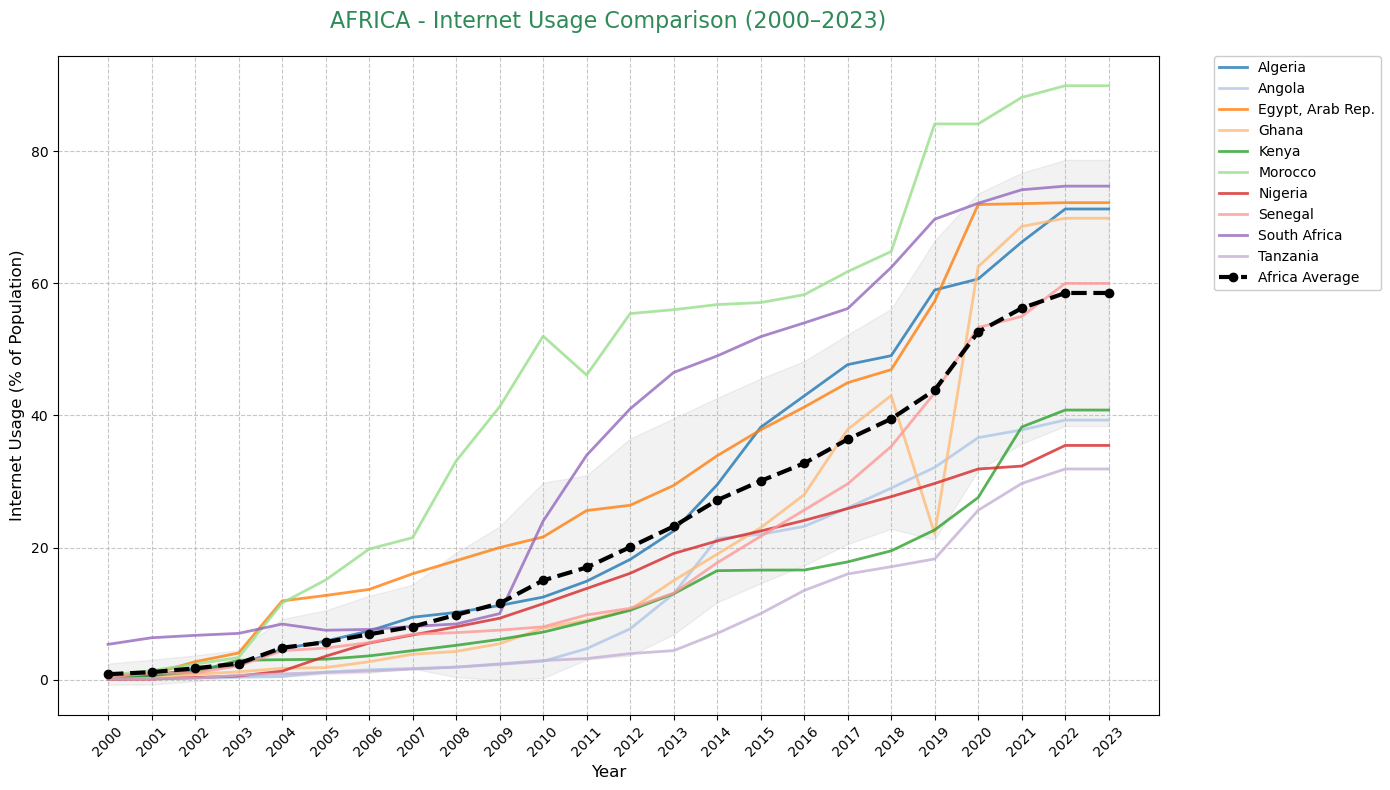

In [13]:
#Plot penetration rates over years for Africa
africa_countries = ["Algeria","Angola","Egypt, Arab Rep.","Ghana","Kenya","Morocco","Nigeria","Senegal","South Africa","Tanzania"]

plt.figure(figsize=(14, 8))

colors = plt.cm.tab20.colors

for i, country in enumerate(africa_countries):
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:],
             row.values.flatten(),
             label=country,
             color=colors[i % len(colors)],
             linestyle='-',
             linewidth=2,
             alpha=0.8)

africa_data = df_combined[df_combined.iloc[:, 0].isin(africa_countries)].iloc[:, 1:]
africa_avg = africa_data.mean(axis=0)
plt.plot(df_combined.columns[1:],
         africa_avg,
         label='Africa Average',
         color='black',
         linestyle='--',
         linewidth=3,
         marker='o',
         markersize=6)

plt.title("AFRICA - Internet Usage Comparison (2000–2023)", fontsize=16, pad=20, color='#2E8B57')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           fontsize=10,
           frameon=True,
           framealpha=1)

plt.annotate('Africa Average',
             xy=(2020, africa_avg[-3]),
             xytext=(2020, africa_avg[-3] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.fill_between(df_combined.columns[1:],
                 africa_avg - africa_data.std(),
                 africa_avg + africa_data.std(),
                 color='gray',
                 alpha=0.1,
                 label='±1 Std Dev')

plt.tight_layout()
plt.savefig("figures/africa.png", bbox_inches='tight')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\1492073928.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(2020, europe_avg[-3]),
C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\1492073928.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(2020, europe_avg[-3] - 15),


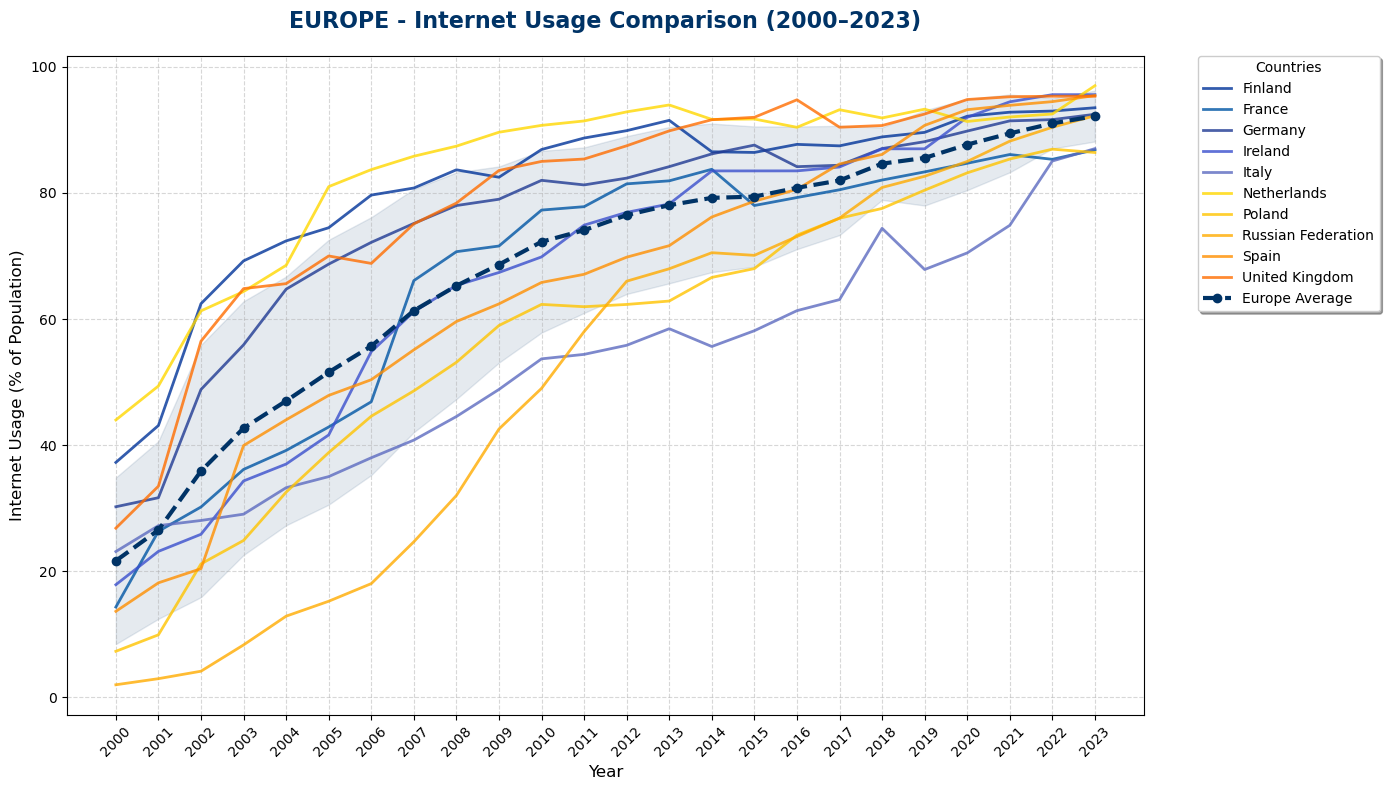

In [14]:
#Plot penetration rates over years for Europe
europe_countries = ["Finland","France","Germany","Ireland","Italy","Netherlands","Poland","Russian Federation","Spain","United Kingdom"]

plt.figure(figsize=(14, 8))

colors = ['#003399', '#0055A4', '#1F3A93', '#3A4FCD', '#5C6BC0', 
          '#FFD700', '#FFC400', '#FFAB00', '#FF8F00', '#FF6D00'] 

for i, country in enumerate(europe_countries):
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:],
             row.values.flatten(),
             label=country,
             color=colors[i],
             linestyle='-',
             linewidth=2,
             alpha=0.8)

europe_data = df_combined[df_combined.iloc[:, 0].isin(europe_countries)].iloc[:, 1:]
europe_avg = europe_data.mean(axis=0)
plt.plot(df_combined.columns[1:],
         europe_avg,
         label='Europe Average',
         color='#003366', 
         linestyle='--',
         linewidth=3,
         marker='o',
         markersize=6)

plt.title("EUROPE - Internet Usage Comparison (2000–2023)",
          fontsize=16, pad=20, color='#003366', weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           fontsize=10,
           frameon=True,
           shadow=True,
           title='Countries')

plt.annotate('Europe Avg',
             xy=(2020, europe_avg[-3]),
             xytext=(2020, europe_avg[-3] - 15),
             arrowprops=dict(facecolor='#003366', shrink=0.05),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.fill_between(df_combined.columns[1:],
                 europe_avg - europe_data.std(),
                 europe_avg + europe_data.std(),
                 color='#003366',
                 alpha=0.1,
                 label='±1 Std Dev')

plt.tight_layout()
plt.savefig("figures/europe.png", bbox_inches='tight')
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\401037961.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(2020, na_avg[-4]),
C:\Users\Asus\AppData\Local\Temp\ipykernel_15076\401037961.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(2020, na_avg[-4] + 10),


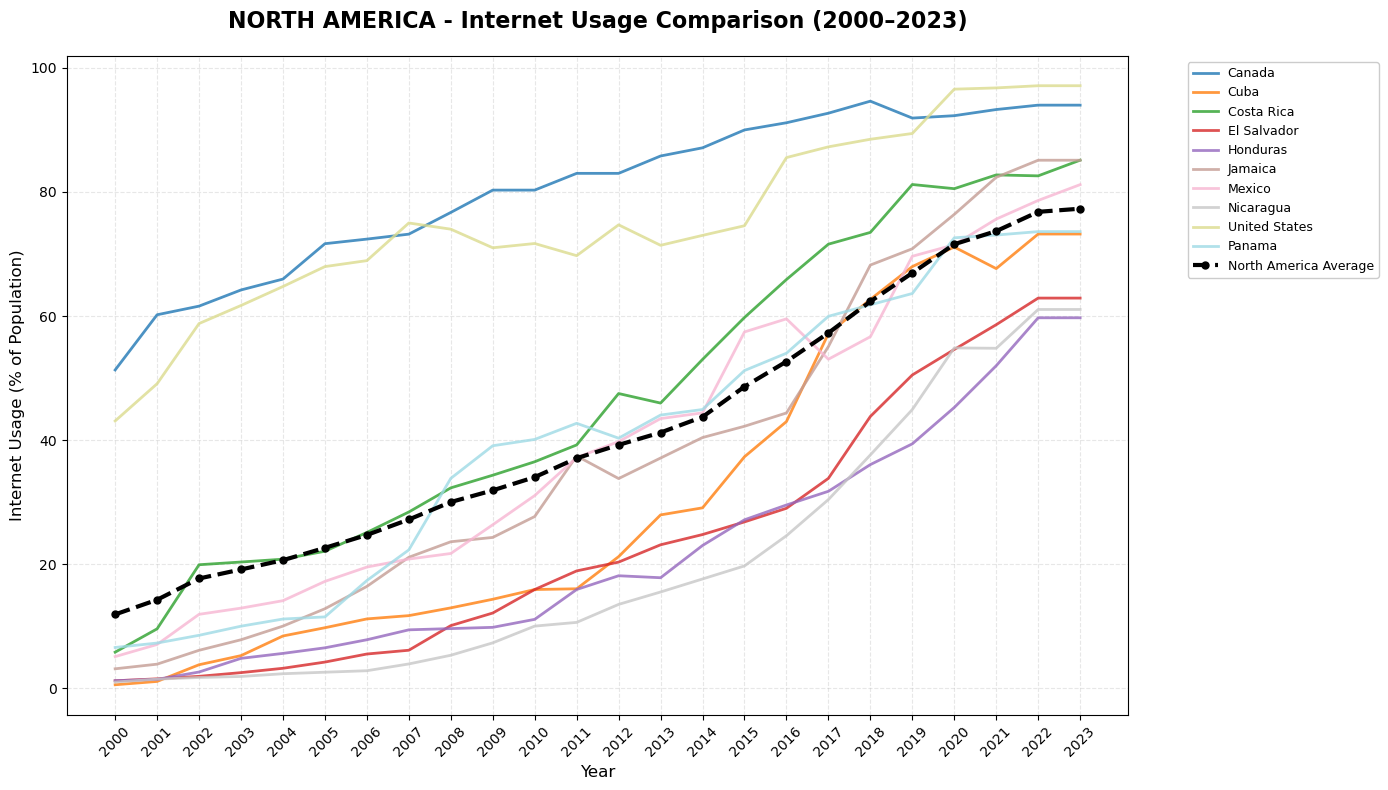

In [15]:
#Plot penetration rates over years for North America
plt.figure(figsize=(14, 8))

north_america_countries = ["Canada","Cuba","Costa Rica","El Salvador","Honduras",
                          "Jamaica","Mexico","Nicaragua","United States","Panama"]

colors = plt.cm.tab20(np.linspace(0, 1, len(north_america_countries)))

for i, country in enumerate(north_america_countries):
    country_data = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:].values.flatten()
    plt.plot(df_combined.columns[1:],
             country_data,
             label=country,
             color=colors[i],
             linewidth=2,
             alpha=0.8)

na_data = df_combined[df_combined.iloc[:, 0].isin(north_america_countries)].iloc[:, 1:]
na_avg = na_data.mean(axis=0)
plt.plot(df_combined.columns[1:],
         na_avg,
         label='North America Average',
         color='black',
         linestyle='--',
         linewidth=3,
         marker='o',
         markersize=5)

plt.title("NORTH AMERICA - Internet Usage Comparison (2000–2023)",
          fontsize=16, pad=20, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           frameon=True,
           framealpha=1,
           fontsize=9)

plt.annotate('Regional Average',
             xy=(2020, na_avg[-4]),
             xytext=(2020, na_avg[-4] + 10),
             arrowprops=dict(arrowstyle='->'),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.tight_layout()
plt.savefig("figures/north-america.png", bbox_inches='tight')
plt.show()

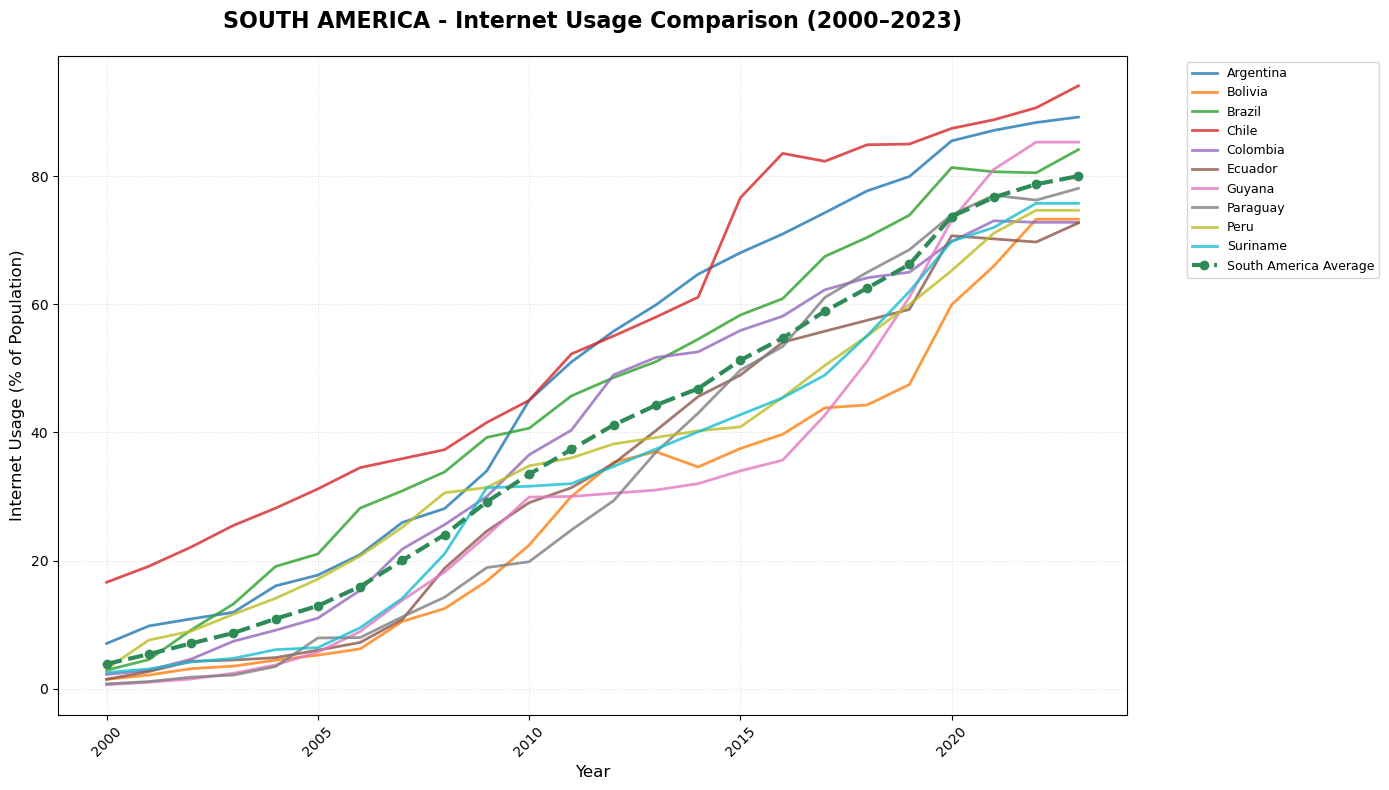

In [16]:
#Plot penetration rates over years for South America
plt.figure(figsize=(14, 8))


south_america_countries = ["Argentina","Bolivia","Brazil","Chile","Colombia",
                          "Ecuador","Guyana","Paraguay","Peru","Suriname"]

# 2. Color Palette (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, country in enumerate(south_america_countries):
    try:
        country_data = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:].values.flatten()
        plt.plot(df_combined.columns[1:].astype(int),  # Ensure years are integers
                 country_data,
                 label=country,
                 color=colors[i],
                 linewidth=2,
                 alpha=0.8)
    except Exception as e:
        print(f"Error plotting {country}: {str(e)}")
        continue

try:
    sa_mask = df_combined.iloc[:, 0].isin(south_america_countries)
    sa_data = df_combined[sa_mask].iloc[:, 1:]
    sa_avg = sa_data.mean(axis=0)

    plt.plot(df_combined.columns[1:].astype(int),
             sa_avg,
             label='South America Average',
             color='#2E8B57',  # Forest green
             linestyle='--',
             linewidth=3,
             marker='o',
             markersize=6)
except Exception as e:
    print(f"Error calculating average: {str(e)}")

plt.title("SOUTH AMERICA - Internet Usage Comparison (2000–2023)",
          fontsize=16, pad=20, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.4)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           frameon=True,
           fontsize=9)


plt.tight_layout()
plt.savefig("figures/south-america.png", bbox_inches='tight')
plt.show()

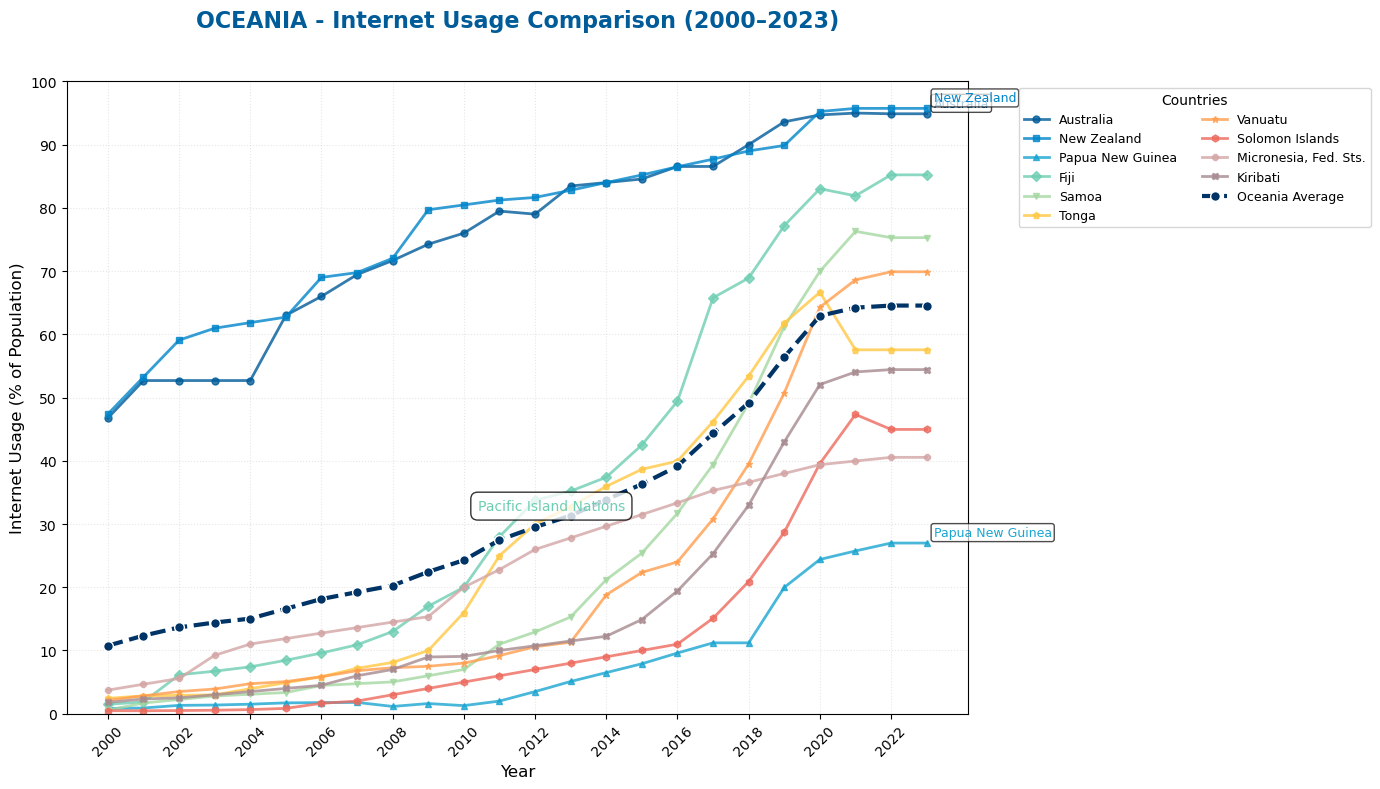

In [17]:
#Plot penetration rates over years for South Oceania
plt.figure(figsize=(14, 8))

oceania_countries = ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Samoa",
                    "Tonga", "Vanuatu", "Solomon Islands", "Micronesia, Fed. Sts.", "Kiribati"]

colors = ['#005B99', '#0085CA', '#1AA5D0', '#6ECEB2', '#A5D8A2',
          '#FFC845', '#FF9E4F', '#ED6A5E', '#D4A5A5', '#A68A8F']

for i, country in enumerate(oceania_countries):
    try:
        country_data = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:].values.flatten()
        plt.plot(df_combined.columns[1:].astype(int),  
                 country_data,
                 label=country,
                 color=colors[i],
                 linewidth=2,
                 alpha=0.8,
                 marker=['o', 's', '^', 'D', 'v', 'p', '*', 'h', '8', 'X'][i],  
                 markersize=5)
    except Exception as e:
        print(f"Error plotting {country}: {str(e)}")
        continue

try:
    oceania_mask = df_combined.iloc[:, 0].isin(oceania_countries)
    oceania_data = df_combined[oceania_mask].iloc[:, 1:]
    oceania_avg = oceania_data.mean(axis=0)

    plt.plot(df_combined.columns[1:].astype(int),
             oceania_avg,
             label='Oceania Average',
             color='#003366',  
             linestyle='--',
             linewidth=3,
             marker='o',
             markersize=7,
             markeredgecolor='white')
except Exception as e:
    print(f"Error calculating average: {str(e)}")

plt.title("OCEANIA - Internet Usage Comparison (2000–2023)\n",
          fontsize=16, pad=20, color='#005B99', weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Internet Usage (% of Population)", fontsize=12)
plt.xticks(np.arange(2000, 2024, 2), rotation=45) 
plt.yticks(np.arange(0, 101, 10))  
plt.ylim(0, 100)  
plt.grid(True, linestyle=':', alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           frameon=True,
           fontsize=9,
           title='Countries',
           ncol=2)  

highlight_countries = ['Australia', 'New Zealand', 'Papua New Guinea']
for country in highlight_countries:
    if country in oceania_countries:
        idx = oceania_countries.index(country)
        last_value = df_combined[df_combined.iloc[:, 0] == country].iloc[:, -1].values[0]
        plt.annotate(country,
                    xy=(2023, last_value),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    color=colors[idx],
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

plt.annotate('Pacific Island Nations',
             xy=(2010, 30),
             xytext=(10, 10),
             textcoords='offset points',
             fontsize=10,
             color='#6ECEB2',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

plt.tight_layout()
plt.savefig("figures/oceania.png", bbox_inches='tight')
plt.show()


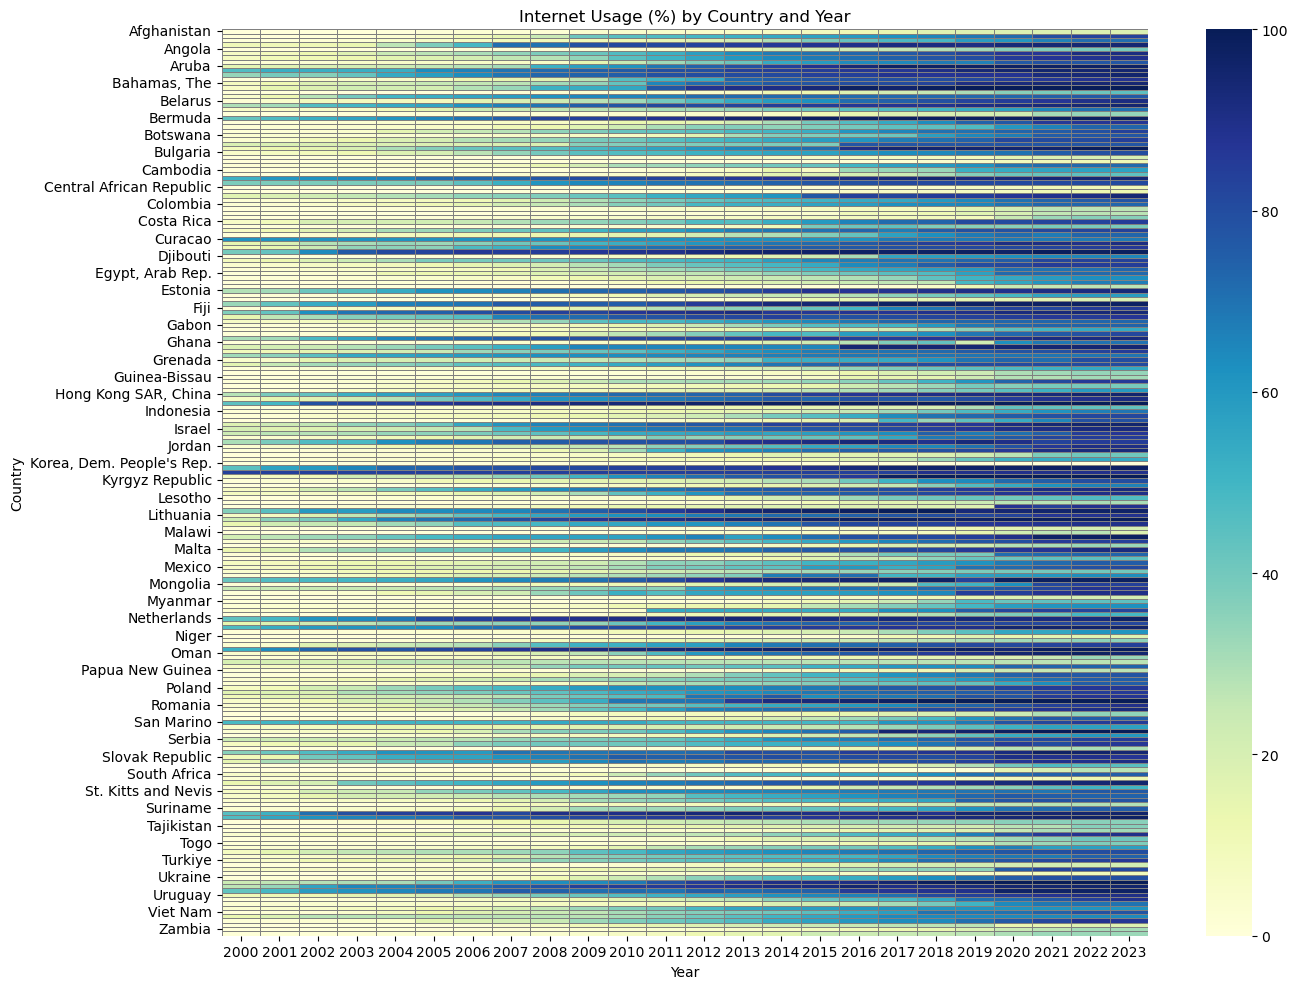

In [18]:
# Plot internet Usage (%) by Country and Year

df_combined.rename(columns={df_combined.columns[0]: "Country"}, inplace=True)
df_long = df_combined.melt(id_vars="Country", var_name="Year", value_name="Internet_Usage")
df_long["Year"] = df_long["Year"].astype(int)
df_heatmap = df_long.pivot(index="Country", columns="Year", values="Internet_Usage")
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Internet Usage (%) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("figures/internet-usage-by-country-and-year.png", bbox_inches='tight')
plt.show()
